<a href="https://colab.research.google.com/github/ayushsinggh09/lstm-stock-forecaster/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [25]:

start = '2015-01-01'
end = '2025-01-01'

df = yf.download('KOTAKBANK.NS', start=start, end=end)
df.head()



/tmp/ipython-input-4259673797.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('KOTAKBANK.NS', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS
Date,,,,,
2015-01-01,624.794800,627.971903,621.071646,627.376223,501996
2015-01-02,631.223389,634.921696,624.645818,625.986129,1263630
2015-01-05,628.691650,634.847276,626.482604,631.496438,610230
2015-01-06,621.195801,626.606797,612.359552,623.007748,2269086
2015-01-07,631.198669,647.307491,619.284577,619.284577,3571774


In [26]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS
Date,,,,,
2024-12-24,1747.035767,1752.629293,1736.048435,1740.543252,2712625
2024-12-26,1750.781494,1767.412222,1740.043874,1754.776888,1132006
2024-12-27,1757.873291,1775.153295,1751.980061,1757.973151,2448271
2024-12-30,1738.695312,1778.948951,1731.503653,1762.967377,5502772
2024-12-31,1783.993164,1794.530941,1733.051898,1733.051898,4731698


In [27]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS
0,2015-01-01,624.794800,627.971903,621.071646,627.376223,501996
1,2015-01-02,631.223389,634.921696,624.645818,625.986129,1263630
2,2015-01-05,628.691650,634.847276,626.482604,631.496438,610230
3,2015-01-06,621.195801,626.606797,612.359552,623.007748,2269086
4,2015-01-07,631.198669,647.307491,619.284577,619.284577,3571774


In [28]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS
0,2015-01-01,624.794800,627.971903,621.071646,627.376223,501996
1,2015-01-02,631.223389,634.921696,624.645818,625.986129,1263630
2,2015-01-05,628.691650,634.847276,626.482604,631.496438,610230
3,2015-01-06,621.195801,626.606797,612.359552,623.007748,2269086
4,2015-01-07,631.198669,647.307491,619.284577,619.284577,3571774
...,...,...,...,...,...,...
2462,2024-12-24,1747.035767,1752.629293,1736.048435,1740.543252,2712625
2463,2024-12-26,1750.781494,1767.412222,1740.043874,1754.776888,1132006
2464,2024-12-27,1757.873291,1775.153295,1751.980061,1757.973151,2448271


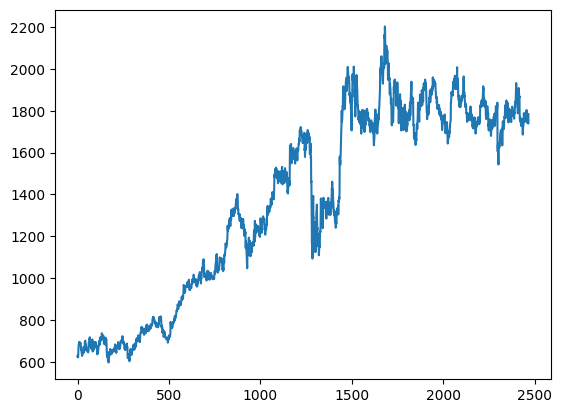

In [29]:
import matplotlib.pyplot as plt
plt.plot(df.Close)

In [30]:
df



Price,Date,Close,High,Low,Open,Volume
Ticker,,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS
0,2015-01-01,624.794800,627.971903,621.071646,627.376223,501996
1,2015-01-02,631.223389,634.921696,624.645818,625.986129,1263630
2,2015-01-05,628.691650,634.847276,626.482604,631.496438,610230
3,2015-01-06,621.195801,626.606797,612.359552,623.007748,2269086
4,2015-01-07,631.198669,647.307491,619.284577,619.284577,3571774
...,...,...,...,...,...,...
2462,2024-12-24,1747.035767,1752.629293,1736.048435,1740.543252,2712625
2463,2024-12-26,1750.781494,1767.412222,1740.043874,1754.776888,1132006
2464,2024-12-27,1757.873291,1775.153295,1751.980061,1757.973151,2448271


In [31]:
def ma(period):
 return df.Close.rolling(period).mean()
ma100 =ma(100)
print(ma100)

Ticker  KOTAKBANK.NS
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
...              ...
2462     1791.050511
2463     1790.652471
2464     1790.217473
2465     1789.888352
2466     1790.043174

[2467 rows x 1 columns]


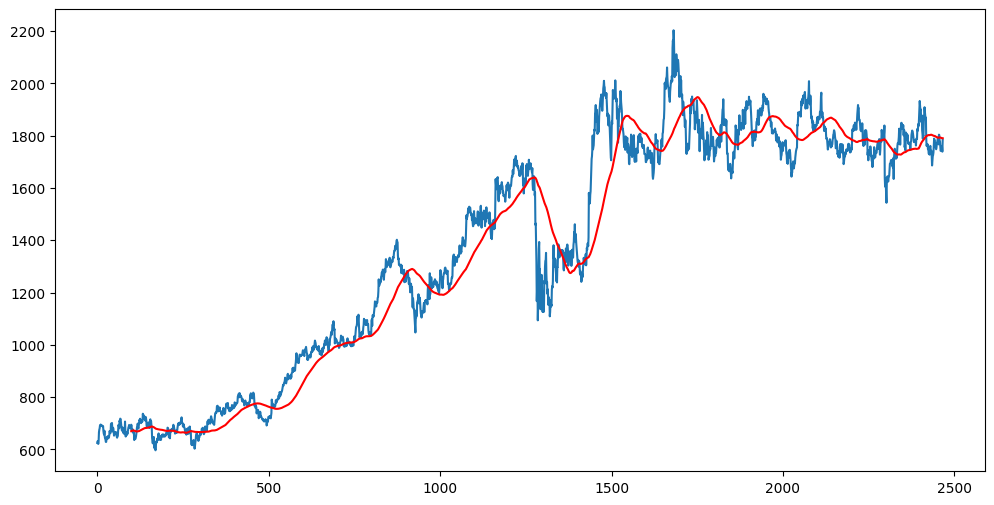

In [32]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [33]:
def ma(period):
 return df.Close.rolling(period).mean()
ma200 =ma(200)    # means from sarting 200 value should be null
print(ma200)



Ticker  KOTAKBANK.NS
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
...              ...
2462     1766.348525
2463     1766.483327
2464     1766.656083
2465     1766.790320
2466     1766.931291

[2467 rows x 1 columns]


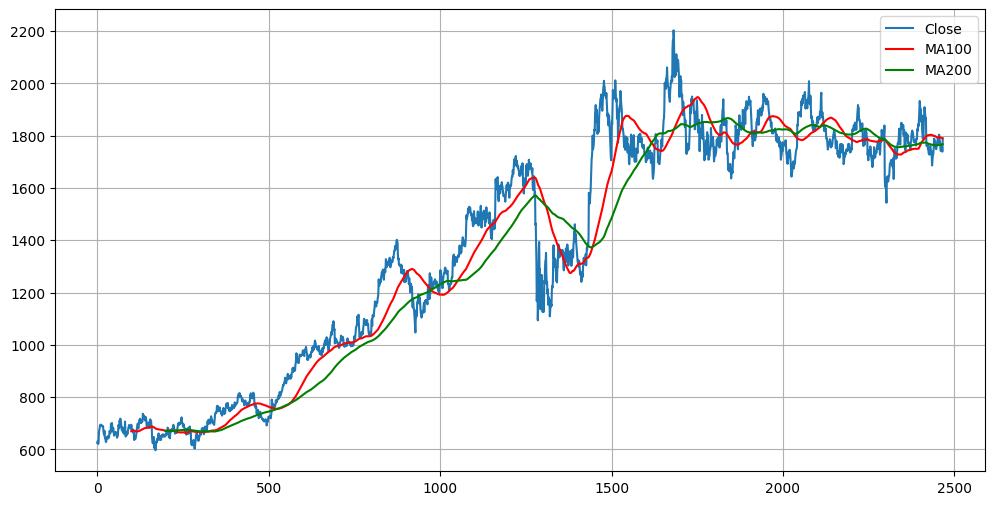

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, ma100, 'r', label='MA100')
plt.plot(df.index, ma200, 'g', label='MA200')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
df.shape

(2467, 6)

In [37]:
# spliting data and testing
import pandas as pd

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1726, 1)
(741, 1)


In [38]:
data_training.head()

Ticker,KOTAKBANK.NS
0,624.794800
1,631.223389
2,628.691650
3,621.195801
4,631.198669


In [39]:
data_testing.head()

Ticker,KOTAKBANK.NS
1726,1748.815552
1727,1789.515747
1728,1817.761841
1729,1845.808472
1730,1915.103638


In [40]:
data_training.tail()

Ticker,KOTAKBANK.NS
1721,1769.090942
1722,1741.990601
1723,1766.948730
1724,1768.393555
1725,1757.732666


In [41]:
data_testing.tail()

Ticker,KOTAKBANK.NS
2462,1747.035767
2463,1750.781494
2464,1757.873291
2465,1738.695312
2466,1783.993164


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [43]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01745249],
       [0.02145514],
       [0.0198788 ],
       ...,
       [0.72859634],
       [0.72949594],
       [0.7228581 ]])

In [44]:
data_training_array.shape

(1726, 1)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_train =[]
y_train = []
for i in range(100,data_training_array.shape[0]):
     x_train.append(data_training_array[i-100:i])
     y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [46]:
x_train.shape

(1626, 100, 1)

In [47]:
#  Ml model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.3))  # kept consistent

model.add(LSTM(units=120))
model.add(Dropout(0.3))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - loss: 0.0531
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 0.0041
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 0.0039
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0031
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 0.0032
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - loss: 0.0029
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - loss: 0.0034
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 0.0034
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 0.0032
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 0.0030
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 0.0030
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0024
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0025
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0028
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/st

In [51]:
model.save('keras_model.h5')

In [52]:
data_training.tail(100)

Ticker,KOTAKBANK.NS
1626,1764.379028
1627,1769.806030
1628,1773.490601
1629,1805.706177
1630,1774.072632
...,...
1721,1769.090942
1722,1741.990601
1723,1766.948730
1724,1768.393555


In [53]:
data_testing.head()

Ticker,KOTAKBANK.NS
1726,1748.815552
1727,1789.515747
1728,1817.761841
1729,1845.808472
1730,1915.103638


In [54]:
past_100_days =data_training.tail(100)

In [55]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [56]:
final_df.head()

Ticker,KOTAKBANK.NS
0,1764.379028
1,1769.806030
2,1773.490601
3,1805.706177
4,1774.072632


In [57]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.33527272],
       [0.34350022],
       [0.34908614],
       [0.39792593],
       [0.34996852],
       [0.3606927 ],
       [0.36114591],
       [0.35261158],
       [0.36167445],
       [0.3032947 ],
       [0.23358655],
       [0.25367561],
       [0.23562556],
       [0.22399495],
       [0.22444836],
       [0.24869133],
       [0.2823747 ],
       [0.3093368 ],
       [0.29868776],
       [0.3436244 ],
       [0.36696113],
       [0.34083015],
       [0.32617858],
       [0.40245737],
       [0.40623338],
       [0.4397663 ],
       [0.4816061 ],
       [0.48757251],
       [0.54059008],
       [0.69337436],
       [0.68355625],
       [0.6979058 ],
       [0.65953998],
       [0.71761734],
       [0.72381026],
       [0.73174018],
       [0.78438022],
       [0.72735976],
       [0.68967367],
       [0.67162362],
       [0.66769604],
       [0.65470615],
       [0.61452783],
       [0.609543  ],
       [0.58522452],
       [0.64420868],
       [0.67396466],
       [0.695

In [58]:
input_data.shape

(841, 1)

In [59]:
x_test =[]
y_test =[]
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [60]:
x_test, y_test =np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(741, 100, 1)
(741,)


In [61]:
# making prediction
y_perdicted= model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [62]:
y_perdicted.shape

(741, 1)

In [63]:
y_test

array([0.31167802, 0.37338075, 0.41620268, 0.45872223, 0.5637758 ,
       0.5180841 , 0.53673857, 0.60274603, 0.58590443, 0.61581143,
       0.57011973, 0.58801877, 0.586886  , 0.59398555, 0.53885309,
       0.51914136, 0.52087836, 0.42594529, 0.46181887, 0.51408139,
       0.5277512 , 0.46574627, 0.50358355, 0.59466491, 0.54398875,
       0.50645331, 0.4222446 , 0.40615806, 0.43213821, 0.48077536,
       0.42194258, 0.29898997, 0.39905888, 0.42466151, 0.405403  ,
       0.41937465, 0.4202054 , 0.44233404, 0.50932325, 0.37149275,
       0.46491552, 0.44384433, 0.38833452, 0.36756535, 0.30699558,
       0.2461991 , 0.26311601, 0.28728367, 0.31031837, 0.32338432,
       0.36227886, 0.27920292, 0.31960794, 0.40948104, 0.34468166,
       0.39112897, 0.33357977, 0.2495974 , 0.26183242, 0.26628798,
       0.27353835, 0.32353515, 0.3095635 , 0.34400193, 0.4337242 ,
       0.38259445, 0.34815602, 0.32859531, 0.35585924, 0.35427307,
       0.38206591, 0.34845786, 0.30435233, 0.23955277, 0.26039

In [64]:
y_perdicted

array([[0.3293866 ],
       [0.33203554],
       [0.3365112 ],
       [0.34758413],
       [0.36805502],
       [0.40456378],
       [0.44596466],
       [0.48223886],
       [0.5150864 ],
       [0.5408946 ],
       [0.5610416 ],
       [0.5702317 ],
       [0.5717505 ],
       [0.5696505 ],
       [0.5678919 ],
       [0.5619415 ],
       [0.55058336],
       [0.5373628 ],
       [0.51664186],
       [0.4947658 ],
       [0.4821045 ],
       [0.48250094],
       [0.486424  ],
       [0.49188015],
       [0.5071118 ],
       [0.5250574 ],
       [0.5349772 ],
       [0.5261092 ],
       [0.5015775 ],
       [0.4731749 ],
       [0.45361784],
       [0.4411772 ],
       [0.4224731 ],
       [0.4045184 ],
       [0.3948025 ],
       [0.39297664],
       [0.39727125],
       [0.40460968],
       [0.4140937 ],
       [0.43040755],
       [0.4379994 ],
       [0.44120854],
       [0.4417484 ],
       [0.43558544],
       [0.42198482],
       [0.39955693],
       [0.36810297],
       [0.334

In [65]:
scaler.scale_

array([0.00151603])

In [66]:
scale_factor =1/0.02906784
y_predicted = model.predict(x_test)
y_perdicted = y_predicted*scale_factor
y_test = y_test *scale_factor

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


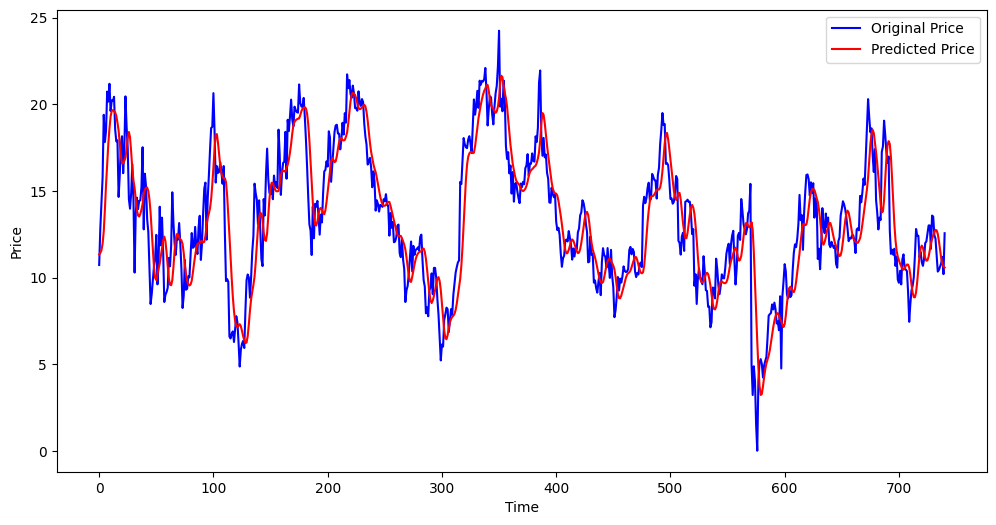

In [67]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_perdicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()